In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
%matplotlib inline

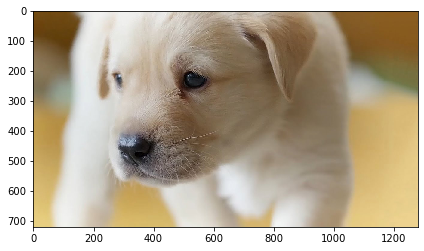

In [2]:
# upload and view image
img = io.imread("dog.jpg")
io.imshow(img)

In [3]:
# Getting Image Resolution
img.shape

(720, 1280, 3)

In [4]:
# Looking at Pixel Value
df = pd.DataFrame(img.flatten())
df.head()

,0
0,113
1,72
2,16
3,113
4,72


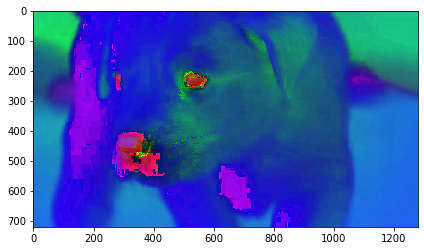

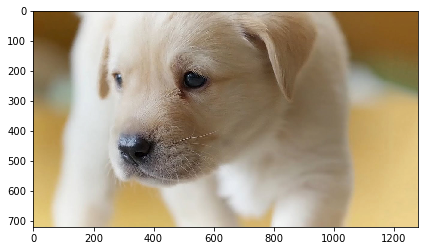

In [5]:
# Converting color space
from skimage import color
from skimage import data
from pylab import * 

#Convert to HSV
img_hsv = color.rgb2hsv(img)

#Convert back to RGB
img_rgb = color.hsv2rgb(img_hsv)

#Show both figures
figure(0)
io.imshow(img_hsv)
figure(1)
io.imshow(img_rgb)

C:\Users\ab59349\AppData\Local\Continuum\anaconda3\envs\imageprocessing\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


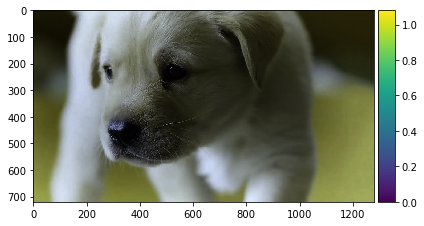

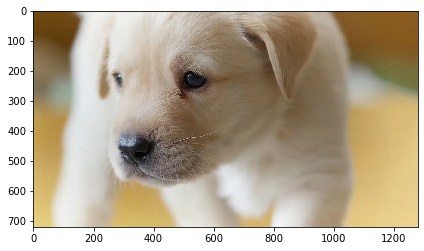

In [6]:
# RGB to XYZ and Vice Versa

#Convert to XYZ
img_xyz = color.rgb2xyz(img)

#Convert back to RGB
img_rgb = color.xyz2rgb(img_xyz)

#Show both figures
figure(0)
io.imshow(img_xyz)
figure(1)
io.imshow(img_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


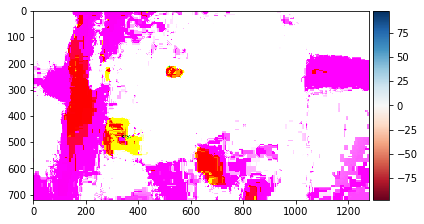

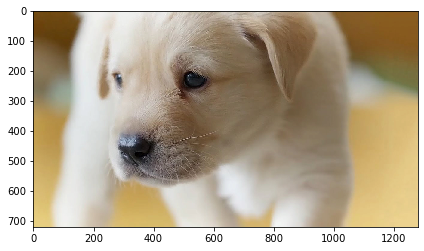

In [7]:
# RGB to LAB and Vice Versa

#Convert to LAB
img_lab = color.rgb2lab(img)

#Convert back to RGB
img_rgb = color.lab2rgb(img_lab)

#Show both figures
figure(0)
io.imshow(img_lab)
figure(1)
io.imshow(img_rgb)

In [8]:
# Saving an Image

#Convert to YPbPr
img_ypbpr= color.rgb2ypbpr(img)

#Convert back to RGB
img_rgb= color.ypbpr2rgb(img_ypbpr)

io.imsave("puppy_ypbpr.jpg", img_ypbpr)

Lossy conversion from float64 to uint8. Range [-0.18394415686274507, 0.9720745098039215]. Convert image to uint8 prior to saving to suppress this warning.


## Creating Basic Drawings

Within an image, we might like to draw certain figures. These figures can
be simple, such as a line, or complex, such as an ellipsoid. Let’s look at
some basic drawings using the skimage drawing class called draw.

In [9]:
from skimage import draw

### Lines
The line function is used to draw a simple line on an image. In the following code, the first two parameters indicate the first point; the last two parameters indicate the second point.

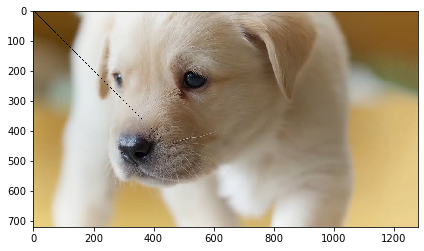

In [10]:
x,y = draw.line(0,0,650,650)
img[x, y] = 0
io.imshow(img)

### Rectangles
To draw rectangles, we use the function polygon. We can draw not only rectangle, but any kind of polygon we want. 
All we have to do is give x and y coordinates, then define the width and the height.

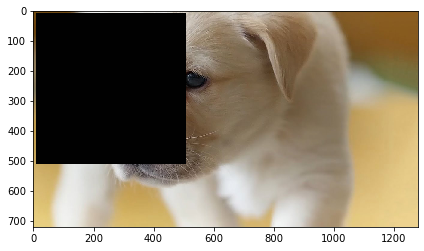

In [11]:
img = io.imread('dog.jpg')

def rectangle(x, y, w, h):
    rr, cc = [x, x + w, x + w, x], [y, y, y + h, y + h]
    return (draw.polygon(rr, cc))

rr, cc = rectangle(10, 10, 500,500)
img[rr, cc] = 1
io.imshow(img)

### Circles

The circle function is used to draw a circle. In the following code, the first two arguments indicate the position 
of the circle inside the image; the last argument indicates the radius.

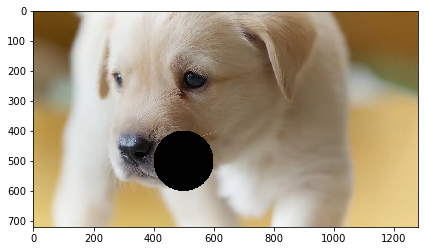

In [12]:
img = io.imread('dog.jpg')

#Define circle coordinates and radius
x, y = draw.circle(500,500, 100)
#Draw circle
img[x, y] = 1

io.imshow(img)

### Doing Gamma Correction

To perform gamma correction of an image, based on the display instrument, we use exposure class in skimage. The 
exposure class contains a function called adjust_gamma, which we use to give an image as an input and the final gamma 
value that we want.

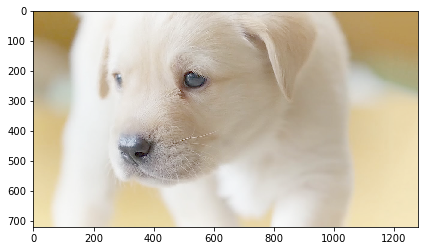

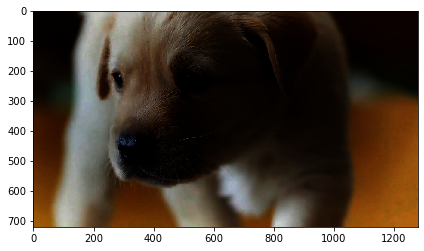

In [13]:
from skimage import exposure
img = io.imread('dog.jpg')
gamma_corrected1 = exposure.adjust_gamma(img, 0.5)
gamma_corrected2 = exposure.adjust_gamma(img, 5)
figure(0)
io.imshow(gamma_corrected1)
figure(1)
io.imshow(gamma_corrected2)

### Rotating, Shifting, and Scaling Images
Sometimes we may want to rotate an image or change its size. To do this,
we use the transform class in the skimage module. transform has two
functions: rotate and resize. rotate takes the degree of rotation as its
parameter; resize takes the new size as its parameter.

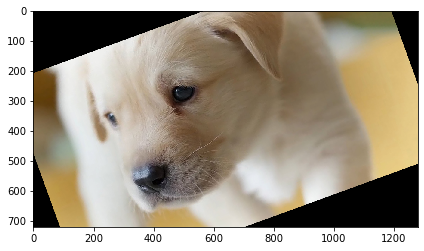

In [14]:
from skimage.transform import rotate
img = io.imread('dog.jpg')
img_rot = rotate(img, 20)
io.imshow(img_rot)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


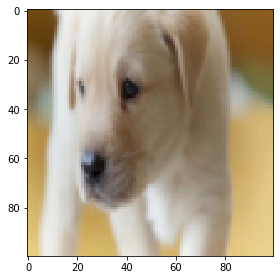

In [15]:
from skimage.transform import resize
img = io.imread('dog.jpg')
img_res = resize(img, (100,100))
io.imshow(img_res)
io.imsave("rsz.jpg", img_res)

### Determining Structural Similarity
structural similarity is used to find the index that
indicate how much two images are similar. A value closer to one means the
images are very similar; a value closer to zero means they are less similar.

In [16]:
from skimage.measure import compare_ssim as ssim
img_original = io.imread('dog.jpg')
img_modified = io.imread('puppy_ypbpr.jpg')
ssim_original = ssim(img_original, img_original, data_range=img_original.max() - img_original.min(), multichannel=True)
ssim_different = ssim(img_original, img_modified, data_range=img_modified.max() - img_modified.min(), multichannel=True)
print(ssim_original,ssim_different)

1.0 0.5986251787314126


SSIM takes three arguments. The first refers to the image; the
second indicates the range of the pixels (the highest pixel color value
less the lowest pixel color value). The third argument is multichannel.
A True value means the image contains more than one channel, such as
RGB. False means there is only one channel, such as grayscale.